#  <font color = 545AA7> Introduction to PDB Files and Biopython </font>

For this activity, we will exam the structures of proteins in **PDB (Protein Data Bank) files** using the **biopython** library. The goals of this activity are listed below:

- Examine the structure of a PDB file
- Use biopython to load PDB files and extract information
- Visualize the extracted information

##  <font color = 545AA7> 1. Download a PDB File </font>

To  obtain protein structural data, the Protein Data Bank website at [https://www.rcsb.org/](https://www.rcsb.org/) provides free access to protein cyrstal structures. To aquire a PDB file, go to this website, find the structure you're looking for, and downnload it in the **PDB Format**. It is important to move the downloaded file into the folder with this Jupyter notebook. When Jupyter looks for a file, it looks in the same directory/folder as the Jupyter notebook unless told otherwise. For this activity, your data has already beend downloaded.

<img src="download_PDB.png" width="400">

##  <font color = 545AA7> 2. PDB Format and Parsing </font>

While some other bioinformatics file formats online include mainly sequence data, the PDB file format provides an assortmet of information including:

- Amino acid sequence
- Non-amino acid species
- *xyz* coordinates of atoms indentified in structure (does not typically include hydrogens)
- Metadata about the protein (e.g., host specie and enzyme class)
- Information about helix and sheet secondary structures

PDB files are text files with the data arranged with specific labels and seperated by strictly-delineated *position* in a line in the file. For more information on PDB file formats, see [https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html](https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html).

### <font color = F28500> Be sure to run the following code cell. </font>

In [49]:
import warnings
from Bio import BiopythonWarning
warnings.simplefilter('ignore', BiopythonWarning)

import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

import Bio.PDB

##  <font color = 545AA7> 3. Parsing PDB Files </font>


There are multiple ways of **parsing** data (i.e., seperating data into pieces) from the PDB files. In this activity, we will use the biopython library's PDB reading capabilities. First, we need to import the **PDB module** of the biopython library with the `import Bio.PDB` import command.

To parse the PDB file, we first create a **parser object** using the `Bio.PDB.PDBParser()` function. Like previous functions, we need to include the name of the library/module it is in, so in this case, `Bio.PDB.PDBParser()` means the `PDBParser()` function in the `PDB` module of the `Bio` (biopython) library. Think of this like a directory system of nested folders on your computer (e.g., /User/Documents/Python_Projects).

Next, we will use the `PDBParser().get_structure()` function to parse a single PDB. By default, <u> any code run in a Jupyter notebook will look in the same directory (i.e., folder) as the Jupyter notebook for the file </u>. We will use the `get_structure()` function as follows. This function requires two inputs: the first is some name you provide in quotes (singel or double) followed by the full name of the file in quotes.

~~~python
parser = Bio.PDB.PDBParser()
structure = parser.get_structure('name', 'file_name.pdb')
~~~

In [50]:
parser = Bio.PDB.PDBParser()
structure = parser.get_structure('Protein A', '6x8j.pdb')

##  <font color = 545AA7> 4. Structure of the Data </font>


The structural data extracted from the PDB by biopython is organized in a hierarchy starting with the **structure** $\rightarrow$ **model** $\rightarrow$ **chain** $\rightarrow$ **residue** $\rightarrow$ **atom**. The structure is the protein, the model is a particular 3D model of the protein, the chain is a single peptide chain in the protein, the residue is an amino acid residue in the chain, and the atom is each atom within a given chain. 

| Level    |    Description      |
|:----------:|:---------------------|
|Structure   | Protein strucutre; may contain multiple models     |
|Model       | Particular 3D model of the protein  |
|Chain       | Each peptide chain in the protein  |
|Residue     | Amino acid residue in a given chain |
|Atom        | Atoms in a particular peptide chain |

While PDB files can contain multiple structures of a protein, most only contain one. Even though there is only one model in our data, we will need to access the first (and only) model using indexing. In square brackets `[]` behind the variable, give the number of the item you want to access. In Python indexing, numbering starts with zero, so the first protein model is `structure[0]`. If there were a second, it would be `structure[1]`.

Using a `for` loop, we can run through your protein model to see how many chains are in it. The code below systematically goes through ever chain in the `protein_model`, assigns in to the variable `chain`, and then prints (i.e., displays on the screen) the information.

In [51]:
protein_model = structure[0]

for chain in protein_model:
    print(chain)

<Chain id=A>
<Chain id=C>
<Chain id=B>
<Chain id=D>
<Chain id=E>
<Chain id=F>


To access a particular chain, use the chain's `id`. For example, to access Chain A, type `protein_model['A']`.Select the first chain and attach its information to an intuative variable of your choice.

In [52]:
chain_A = protein_model['A']
res = chain_A[58]
res

<Residue TYR het=  resseq=58 icode= >

In [53]:
res.get_unpacked_list()

[<Atom N>,
 <Atom CA>,
 <Atom C>,
 <Atom O>,
 <Atom CB>,
 <Atom CG>,
 <Atom CD1>,
 <Atom CD2>,
 <Atom CE1>,
 <Atom CE2>,
 <Atom CZ>,
 <Atom OH>]

##  <font color = 545AA7> 5. Examining Amino Acid Frequency </font>

### <Font color = 545aa7> a. All Amino Acids in Protein </font>

Next, we will look at and visualize the amino acid residue distribution in our protein. Below is code that you can run that iterates through the peptides and adds each amino acid residue identity to a list called `amino_acids`.

In [54]:
def get_aa(file):
    '''Accepts a PDB files name (string) and returns a list of residues
    that occur in a peptide.
    
     >>> ('1abc.pdb') -> ['GLY', 'ALA', 'LYS']
    '''

    amino_acids = []  # empty list to add the amino acids to

    parser = Bio.PDB.PDBParser()
    structure = parser.get_structure('6x8j', file)
    pp = Bio.PDB.PPBuilder().build_peptides(structure[0])

    # go through each chain and residue and append the amino acid identity to the list
    for chain in pp:
        for res in chain:
            res_name = res.get_resname()
            amino_acids.append(res_name)
            
    return amino_acids 

In [55]:
amino_acids = get_aa('6x8j.pdb')

### <font color = F28500> Visualization Using a countplot() </font>

Next, we will visualize the above data using the **seaborn** plotting library's `sns.coutplot()` function. This plotting function takes in the data and tallies the number of occurances of each value in the data. In this case, the data are stored in the variable `sense`.

~~~python
sns.countplot(x=<data>)
plt.xticks(rotation=45)
plt.show()
~~~

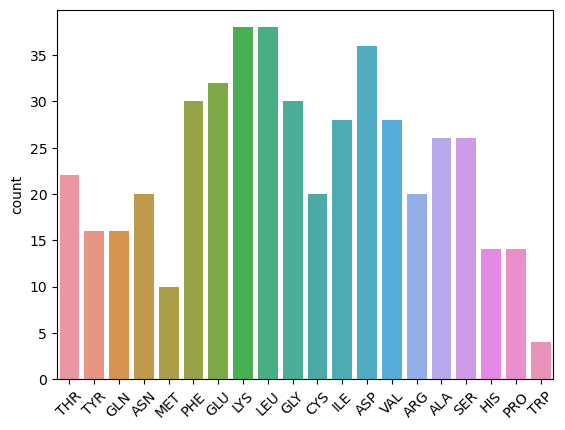

In [56]:
sns.countplot(x=amino_acids)
plt.xticks(rotation = 45)
plt.show()

### <Font color = 545aa7> b. Amino Acids in Helicies and Sheets </font>

Next, we will harvest lists of amino acids residues that occur at the start of a helix or sheet. *Note: not all helicies are $\alpha$-helicies as there are a fare number of $3_{10}$-helices in this dataset as well.*

In [57]:
def get_helix_start(file):
    '''Accepts a PDB files name (string) and returns a list of residues
    that occur at the start of a helix.
    
     >>> ('1abc.pdb') -> ['GLY', 'ALA', 'LYS']
    '''
    
    AA_list = []
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('HELIX'):
                AA_list.append(line[15:18])
    
    return AA_list

In [58]:
def get_sheet_start(file):
    '''Accepts a PDB files name (string) and returns a list of residues
    that occur at the start of a sheet.
    
     >>> ('1abc.pdb') -> ['GLY', 'ALA', 'LYS']
    '''
    
    AA_list = []
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SHEET'):
                AA_list.append(line[17:20])
    
    
    return AA_list

Now that we have the fuctions created, instead of just running them on a single PDB file, we will have Python run them <u>on an entire folder of PDB files</u>.

In [59]:
path, _ = os.path.split(os.getcwd())
top80 = os.path.join(path, 'Top80')

helix_start = []
sheet_start = []
general = []

for file in os.listdir(top80):
    if file.endswith('pdb'):
        helix_start.extend(get_helix_start(os.path.join(top80,file)))
        sheet_start.extend(get_sheet_start(os.path.join(top80,file)))
        general.extend(get_aa(os.path.join(top80,file)))

### <font color = F28500> Let's now plot the result. </font>

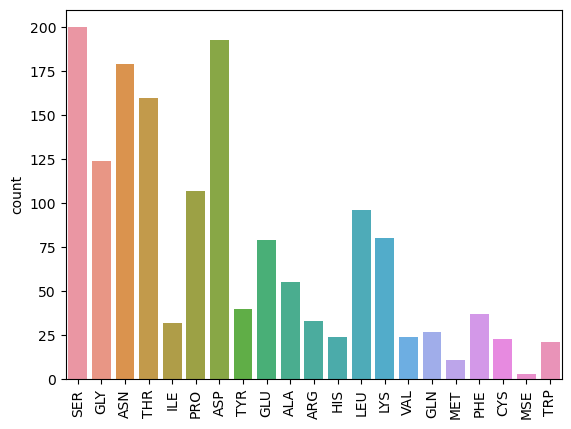

In [60]:
sns.countplot(x= helix_start)
plt.xticks(rotation = 90)
plt.show()

We can combine the two lists of amino acids and plot them in the same plot to better see how the occurance of the amino acids appear at the start of different secondary structures.

In [61]:
import pandas as pd

#df_aa = pd.DataFrame([general, len(general) *['general']]).transpose()
df_hel = pd.DataFrame([helix_start, len(helix_start) *['helix_start']]).transpose()
df_beta = pd.DataFrame([sheet_start, len(sheet_start) *['sheet_start']]).transpose()

df = pd.concat((df_hel, df_beta))
df.columns = ['amino_acid', 'location',]

df

,amino_acid,location
0,SER,helix_start
1,GLY,helix_start
2,ASN,helix_start
3,THR,helix_start
4,ILE,helix_start
...,...,...
1726,THR,sheet_start
1727,VAL,sheet_start
1728,GLU,sheet_start
1729,SER,sheet_start


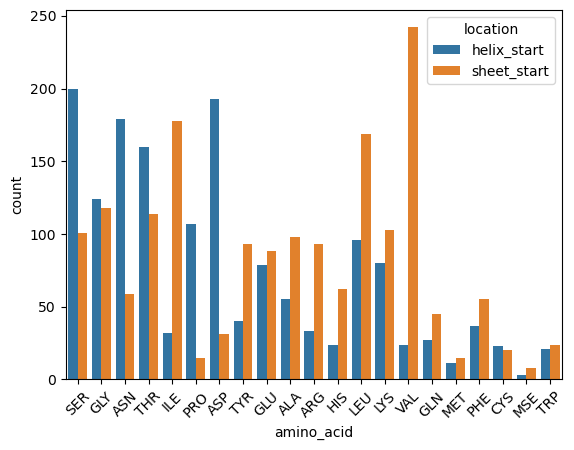

In [62]:
sns.countplot(x=df['amino_acid'], hue=df['location'])
plt.xticks(rotation=45)
plt.show()

##  <font color = 545AA7> 6. Examining β-Sheets </font>

The $\beta$-sheets in proteins consist of amino acid strands that may or may not be adjacent to each other in a peptide strand, and the adjacent strands in a $\beta$-sheet may be parallel or anti-parallel. PDB files contain information as to the direction of the strands by marking a segment of a $\beta$-sheet as `0` if is is the first segment of a sheet, `1` if a segment is parallel with the previous segment in the sheet, and `-1` is a segment is anti-parallel with a previous segment of a $\beta$-sheet.

<img src="5CPA_public_domain_image.png" width="300">

The following code creates a function called `get_sheet_direction()` to harvest the relationship of each strand with the previous one in the $\beta$-sheets. The next code block 

In [69]:
def get_sheet_direction(file):
    '''Accepts a PDB files name (string) and returns a list
    of values indicating if a strand starts a beta sheet (0),
    strand is parallel to the previous strand (1), or is
    anti-parallel to the previous strand (-1).
    
     >>> ('1abc.pdb') -> [0, 1, 1, 1, -1]
    '''
    
    structure_list = []
    
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('SHEET'):
                sense = int(line[38:40].strip())
                print(sense)
                structure_list.append(sense)
    
    
    return structure_list

In [70]:
current_directory = os.getcwd()[:-11]
top80 = os.path.join(current_directory, 'Top80')

sense = []

for file in os.listdir(top80):
    if file.endswith('pdb'):
        sense.extend(get_sheet_direction(os.path.join(top80,file)))

0
1
1
-1
-1
0
1
1
-1
-1
0
-1
-1
1
1
1
-1
-1
-1
0
-1
0
1
-1
-1
-1
0
1
-1
-1
-1
-1
-1
0
-1
0
-1
0
1
-1
-1
-1
0
1
-1
-1
-1
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
-1
0
-1
-1
-1
0
1
-1
-1
-1
0
1
-1
0
-1
0
-1
0
-1
-1
0
1
1
1
1
1
1
1
1
0
-1
0
-1
0
-1
1
1
-1
-1
-1
-1
-1
1
1
0
-1
-1
-1
0
-1
1
1
1
1
1
1
0
-1
1
1
1
1
1
1
1
1
1
0
-1
1
1
1
1
1
1
1
1
1
1
0
-1
1
1
1
1
1
1
1
1
1
0
-1
0
-1
-1
-1
0
1
0
-1
-1
1
1
1
0
1
1
-1
-1
0
1
1
-1
0
-1
-1
-1
-1
0
-1
0
-1
-1
1
1
1
0
1
1
-1
-1
0
1
1
-1
0
-1
-1
-1
-1
-1
0
-1
-1
-1
-1
-1
0
-1
1
-1
-1
0
-1
-1
0
-1
0
-1
0
-1
-1
-1
-1
0
-1
-1
1
0
-1
0
1
1
1
1
1
-1
1
1
1
1
1
0
-1
0
-1
0
-1
-1
-1
-1
0
-1
-1
1
0
-1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
-1
0
-1
-1
0
1
0
-1
-1
0
-1
-1
-1
-1
-1
0
-1
-1
0
-1
1
1
1
1
0
1
-1
0
-1
0
-1
0
-1
-1
1
-1
-1
0
-1
1
-1
0
-1
-1
-1
0
-1
-1
1
-1
-1
0
-1
-1
1
-1
-1
0
-1
1
-1
0
-1
-1
-1
0
-1
-1
1
-1
-1
0
-1
-1
-1
-1
-1
-1
0
-1
-1
-1
-1
-1
-1
10
-1
0
-1
-1
-1
-1
-1
-1
0
0
-1
0
-1
-1
-1
-1
-1
-1
0

<Axes: ylabel='count'>

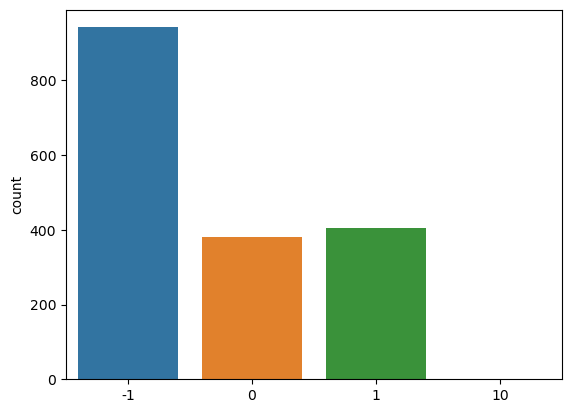

In [66]:
sns.countplot(x=sense)